In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.shape

(374, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [9]:
df.rename(columns = {'Person ID': 'person_id',
                       'Gender': 'gender',
                       'Age': 'age',
                       'Occupation': 'occupation',
                       'Sleep Duration': 'sleep_duration',
                       'Quality of Sleep': 'quality_of_sleep',
                       'Physical Activity Level': 'physical_activity_level',
                       'Stress Level': 'stress_level',
                       'BMI Category': 'bmi_category',
                       'Blood Pressure': 'blood_pressure',
                       'Heart Rate': 'heart_rate',
                       'Daily Steps': 'daily_steps',
                       'Sleep Disorder': 'sleep_disorder'                      
                      }, inplace=True)

In [10]:
df.nunique()

person_id                  374
gender                       2
age                         31
occupation                  11
sleep_duration              27
quality_of_sleep             6
physical_activity_level     16
stress_level                 6
bmi_category                 4
blood_pressure              25
heart_rate                  19
daily_steps                 20
sleep_disorder               2
dtype: int64

In [11]:
df['occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [12]:
df['occupation'].value_counts()

occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [13]:
df.loc[df.occupation == 'Software Engineer', 'occupation'] = 'Engineer'
df.loc[df.occupation == 'Sales Representative', 'occupation'] = 'Salesperson'
df.loc[df.occupation == 'Scientist','occupation'] = 'Other'
df.loc[df.occupation == 'Manager', 'occupation'] = 'Other'

In [14]:
df['occupation'].unique()

array(['Engineer', 'Doctor', 'Salesperson', 'Teacher', 'Nurse',
       'Accountant', 'Other', 'Lawyer'], dtype=object)

In [15]:
df['occupation'].value_counts()

occupation
Nurse          73
Doctor         71
Engineer       67
Lawyer         47
Teacher        40
Accountant     37
Salesperson    34
Other           5
Name: count, dtype: int64

In [16]:
df.bmi_category.unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [17]:
df.bmi_category.value_counts()

bmi_category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [18]:
df.loc[df.bmi_category == 'Normal Weight', 'bmi_category'] = 'Normal'

In [19]:
df.bmi_category.unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [20]:
df.bmi_category.value_counts()

bmi_category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [21]:
df.sleep_disorder.unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [22]:
df.sleep_disorder = df.sleep_disorder.fillna(value='None')

In [23]:
df.blood_pressure

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: blood_pressure, Length: 374, dtype: object

In [24]:
df[['systolic_blood_pressure', 'diastolic_blood_pressure']] = df['blood_pressure'].str.split("/", expand = True).astype(int)

In [25]:
df.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,systolic_blood_pressure,diastolic_blood_pressure
0,1,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


### Correlation 

In [26]:
selected_columns = ['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 
                    'stress_level', 'heart_rate', 'daily_steps','systolic_blood_pressure','diastolic_blood_pressure']
df_selected = df[selected_columns]

In [27]:
corr = df_selected.corr()

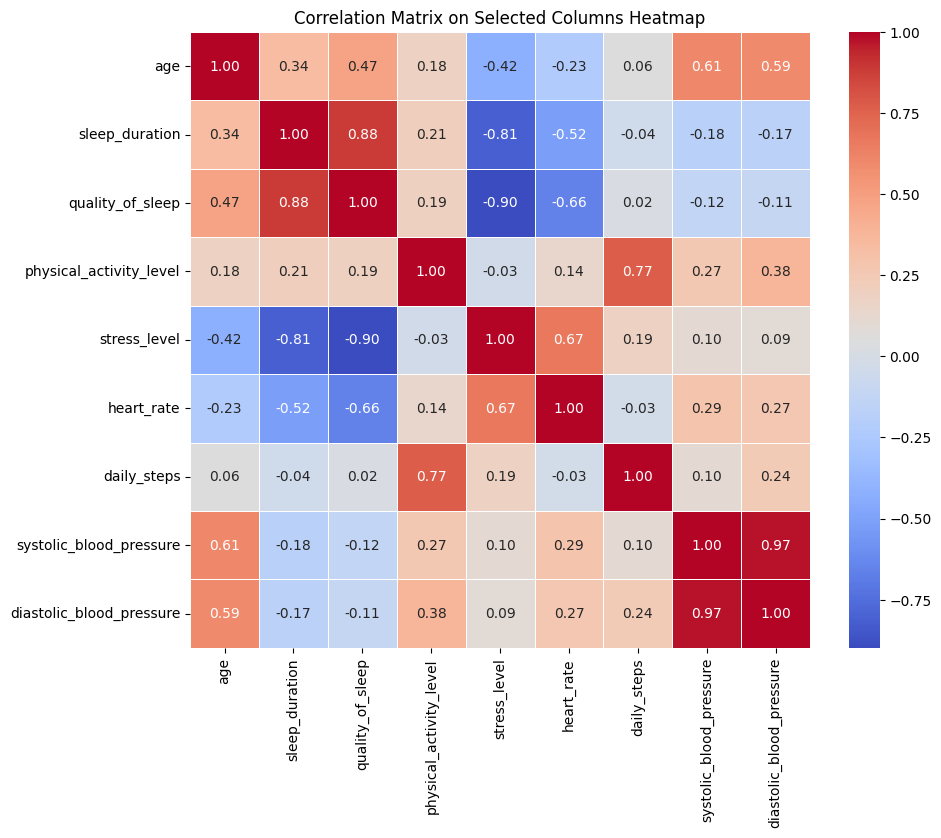

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix on Selected Columns Heatmap')
plt.show()

In [29]:
df2= df[['sleep_duration','quality_of_sleep', 'physical_activity_level','stress_level','heart_rate','daily_steps']]

Text(0.5, 1.0, 'Sleep Duration VS Quality Of Sleep')

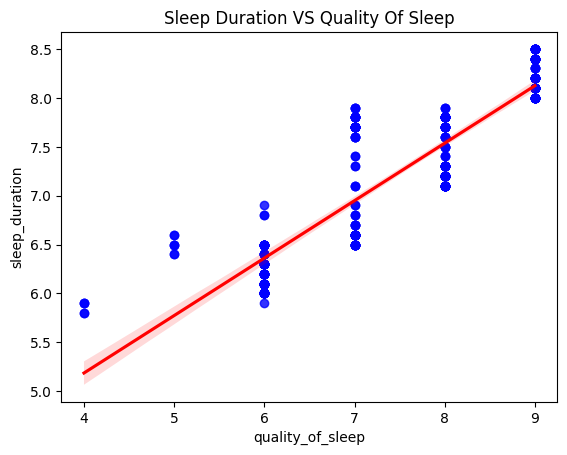

In [30]:
#high positive correlation between Sleep duration and Quality Of Sleep
sns.regplot(x='quality_of_sleep',y='sleep_duration',data=df2,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Sleep Duration VS Quality Of Sleep')

Text(0.5, 1.0, 'Stress Level VS Quality Of Sleep')

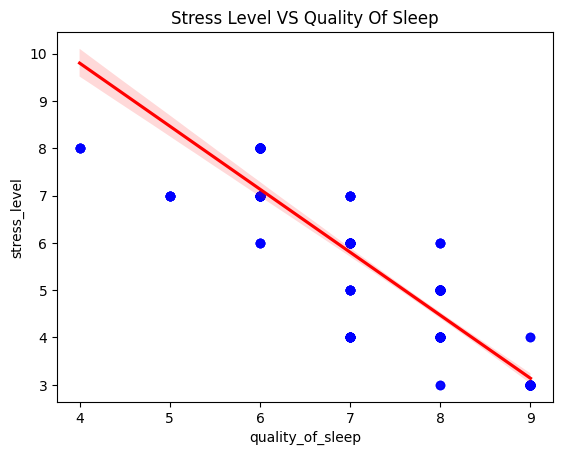

In [31]:
#high negative correlation between Stress level and Quality of Sleep
sns.regplot(x='quality_of_sleep',y='stress_level',data=df2,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Stress Level VS Quality Of Sleep')

### Summary 

**Correlations (>0.5)**

-quality of sleep and sleep duration

-heart rate and stress level

-daily steps and physical activity level

-blood pressure and age

**Correlations (<-0.5)**

-stress level and sleep duration

-stress level and quality of sleep

-heart rate abd sleep duration

-heart rate and quality of sleep

In [32]:
s_v =df[['sleep_duration','quality_of_sleep','sleep_disorder']].copy(deep=True)
s_v.head()

,sleep_duration,quality_of_sleep,sleep_disorder
0,6.1,6,None
1,6.2,6,None
2,6.2,6,None
3,5.9,4,Sleep Apnea
4,5.9,4,Sleep Apnea


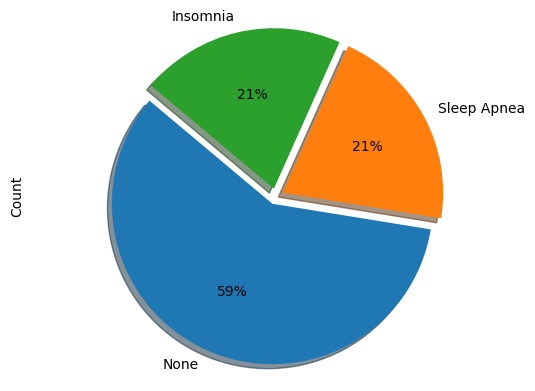

In [33]:
# Grouping by sleep_disorder column.
sleep_disorder_counts = s_v['sleep_disorder'].value_counts()

#Pie Chart
sleep_disorder_counts.plot(kind = 'pie', 
                           autopct='%1.0f%%',
                          explode=[0.05]*len(sleep_disorder_counts), # dilimleri ayırmak için explode kullandık.  # You can use explode to separate the slices.
                          shadow=True, #Gölgelendirme ,#shadowing
                          startangle=140) #çizim başlangıç derecesi ##drawing starting angle
plt.axis('equal')
plt.ylabel('Count')
plt.show()

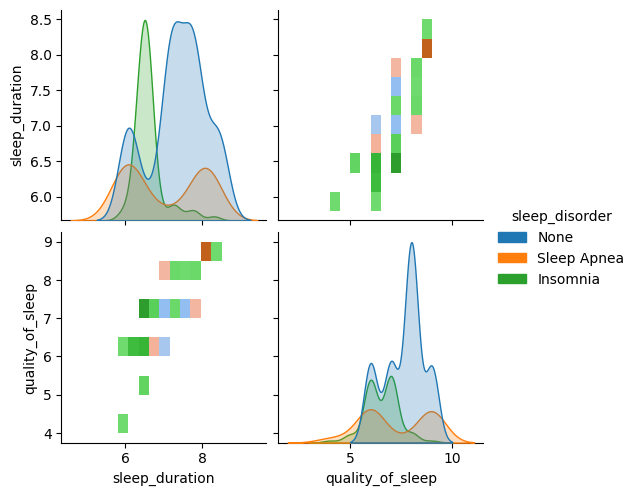

In [34]:
sns.pairplot(data=s_v, kind="hist", hue='sleep_disorder', diag_kind='kde')
plt.show()

**Sleep duration:** People with sleep apnoea tend to have less sleep duration than other groups

**Time to fall asleep:** People with sleep apnoea tend to have a longer time to fall asleep than other groups.

**Sleep efficiency:** People with sleep apnoea tend to have lower sleep efficiency than other groups.

In [35]:
s_v.groupby('sleep_disorder').mean()

,sleep_duration,quality_of_sleep
sleep_disorder,,
Insomnia,6.589610,6.532468
None,7.358447,7.625571
Sleep Apnea,7.032051,7.205128


sns.boxplot(data=s_v, x='quality_of_sleep', y='sleep_disorder', showmeans=True, meanline=True);

In [36]:
s_v.groupby('sleep_disorder').corr(method = 'pearson', numeric_only = True)

sleep_duration  quality_of_sleep
sleep_disorder                                                   
Insomnia       sleep_duration          1.000000          0.753207
               quality_of_sleep        0.753207          1.000000
None           sleep_duration          1.000000          0.836940
               quality_of_sleep        0.836940          1.000000
Sleep Apnea    sleep_duration          1.000000          0.944228
               quality_of_sleep        0.944228          1.000000

In [37]:
scipy.stats.normaltest(s_v.quality_of_sleep)

NormaltestResult(statistic=25.539591571592695, pvalue=2.8454316322969777e-06)

In [38]:
scipy.stats.mannwhitneyu(s_v[s_v.sleep_disorder == 'None'].quality_of_sleep, s_v[s_v.sleep_disorder == 'Sleep Apnea'].quality_of_sleep)

MannwhitneyuResult(statistic=9450.5, pvalue=0.1469825908691403)

In [39]:
scipy.stats.mannwhitneyu(s_v[s_v.sleep_disorder=='None'].quality_of_sleep,s_v[s_v.sleep_disorder=='Insomnia'].quality_of_sleep)

MannwhitneyuResult(statistic=13330.5, pvalue=2.8434741946408995e-15)

In [40]:
scipy.stats.mannwhitneyu(s_v[s_v.sleep_disorder=='Sleep Apnea'].quality_of_sleep,s_v[s_v.sleep_disorder=='Insomnia'].quality_of_sleep)

MannwhitneyuResult(statistic=3534.5, pvalue=0.04549503830464518)

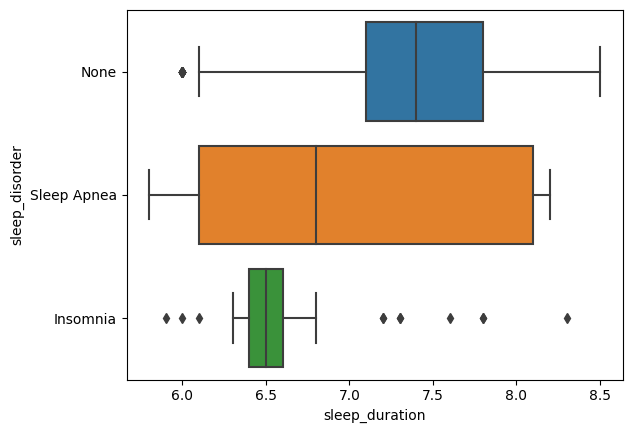

In [41]:
sns.boxplot(data = s_v, x='sleep_duration', y='sleep_disorder');

In [42]:
scipy.stats.normaltest(s_v.sleep_duration)

NormaltestResult(statistic=421.66773216455977, pvalue=2.7290743156282892e-92)

In [43]:
scipy.stats.mannwhitneyu(s_v[s_v.sleep_disorder == 'None'].sleep_duration, s_v[s_v.sleep_disorder == 'Sleep Apnea'].sleep_duration)

MannwhitneyuResult(statistic=9772.5, pvalue=0.05810214416524308)

In [44]:
scipy.stats.mannwhitneyu(s_v[s_v.sleep_disorder=='None'].sleep_duration, s_v[s_v.sleep_disorder=='Insomnia'].sleep_duration)

MannwhitneyuResult(statistic=13266.5, pvalue=6.335915075528475e-14)

In [45]:
scipy.stats.mannwhitneyu(s_v[s_v.sleep_disorder =='Sleep Apnea'].sleep_duration,s_v[s_v.sleep_disorder == 'Insomnia'].sleep_duration)

MannwhitneyuResult(statistic=3206.5, pvalue=0.46550737996645586)

In [46]:
s_v.corr(method = 'pearson', numeric_only=True)

,sleep_duration,quality_of_sleep
sleep_duration,1.000000,0.883213
quality_of_sleep,0.883213,1.000000


In [47]:
s_v.groupby('sleep_disorder').corr(method='pearson')

sleep_duration  quality_of_sleep
sleep_disorder                                                   
Insomnia       sleep_duration          1.000000          0.753207
               quality_of_sleep        0.753207          1.000000
None           sleep_duration          1.000000          0.836940
               quality_of_sleep        0.836940          1.000000
Sleep Apnea    sleep_duration          1.000000          0.944228
               quality_of_sleep        0.944228          1.000000

### Summary of insights
In the category 'Insomnia', there is a positive correlation of around 0.75 between 'sleep_duration' and 'quality_of_sleep'. This indicates that there is a significant relationship between sleep duration and sleep quality. That is, as sleep duration increases, sleep quality tends to increase.
Similarly, a strong correlation (around 0.84) is observed between sleep duration and sleep quality in the category 'None' (no sleep disorder).
There is also a strong positive correlation (around 0.94) between sleep duration and sleep quality in the 'Sleep Apnoea' category.
These results show that there is a strong relationship between sleep duration and sleep quality and that this relationship persists even under different sleep disorders.

In [48]:
demo_sleep = df[['sleep_disorder', 'quality_of_sleep','sleep_duration','gender','age','occupation']].copy(deep=True)

In [49]:
demo_sleep.head()

,sleep_disorder,quality_of_sleep,sleep_duration,gender,age,occupation
0,None,6,6.1,Male,27,Engineer
1,None,6,6.2,Male,28,Doctor
2,None,6,6.2,Male,28,Doctor
3,Sleep Apnea,4,5.9,Male,28,Salesperson
4,Sleep Apnea,4,5.9,Male,28,Salesperson


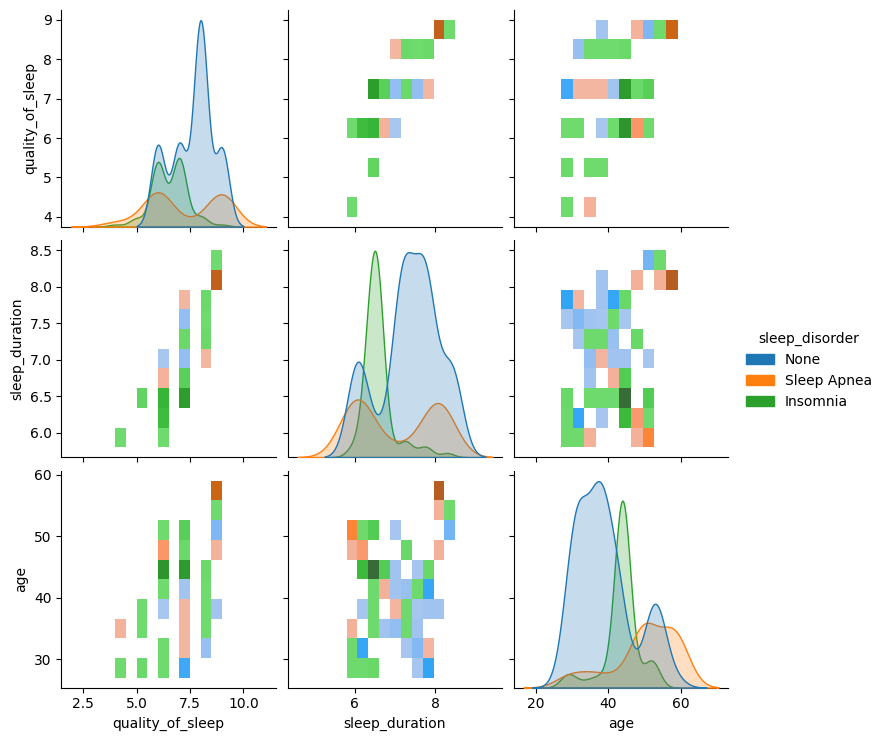

In [50]:
sns.pairplot(data=demo_sleep, kind="hist", hue='sleep_disorder', diag_kind='kde')
plt.show()

In [51]:
demo_sleep.corr(method='pearson',numeric_only=True)

,quality_of_sleep,sleep_duration,age
quality_of_sleep,1.000000,0.883213,0.473734
sleep_duration,0.883213,1.000000,0.344709
age,0.473734,0.344709,1.000000


In [52]:
demo_sleep.groupby('sleep_disorder').corr(method='pearson',numeric_only=True)

quality_of_sleep  sleep_duration       age
sleep_disorder                                                             
Insomnia       quality_of_sleep          1.000000        0.753207  0.505891
               sleep_duration            0.753207        1.000000  0.220630
               age                       0.505891        0.220630  1.000000
None           quality_of_sleep          1.000000        0.836940  0.725944
               sleep_duration            0.836940        1.000000  0.600184
               age                       0.725944        0.600184  1.000000
Sleep Apnea    quality_of_sleep          1.000000        0.944228  0.734103
               sleep_duration            0.944228        1.000000  0.557955
               age                       0.734103        0.557955  1.000000

In [53]:
demo_sleep.groupby('gender').mean(numeric_only=True)

,quality_of_sleep,sleep_duration,age
gender,,,
Female,7.664865,7.229730,47.405405
Male,6.968254,7.036508,37.074074


In [54]:
scipy.stats.mannwhitneyu(demo_sleep[demo_sleep.gender == 'Male'].sleep_duration, demo_sleep[demo_sleep.gender == 'Female'].sleep_duration)

MannwhitneyuResult(statistic=14929.5, pvalue=0.014440351736077347)

In [55]:
scipy.stats.mannwhitneyu(demo_sleep[demo_sleep.gender=='Male'].quality_of_sleep, demo_sleep[demo_sleep.gender =='Female'].quality_of_sleep)

MannwhitneyuResult(statistic=11596.0, pvalue=6.047606194925148e-09)

In [56]:
scipy.stats.mannwhitneyu(demo_sleep[demo_sleep.gender=='Male'].age,demo_sleep[demo_sleep.gender=='Female'].age)

MannwhitneyuResult(statistic=5644.0, pvalue=8.379659804355159e-30)

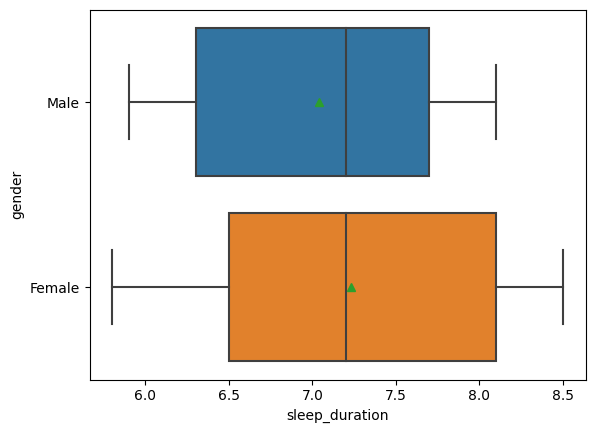

In [57]:
sns.boxplot(data=demo_sleep, x='sleep_duration', y='gender', showmeans=True);

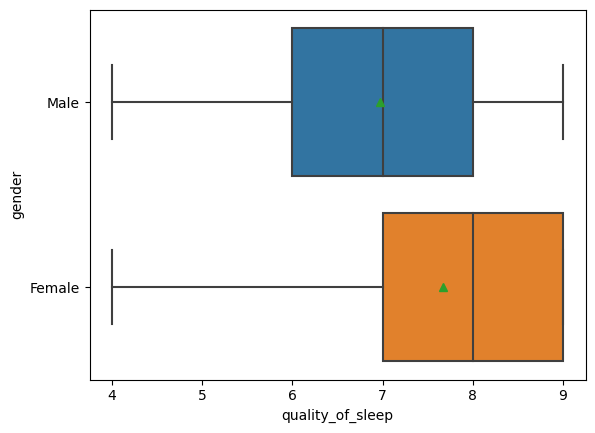

In [58]:
sns.boxplot(data = demo_sleep, x='quality_of_sleep', y='gender', showmeans=True);

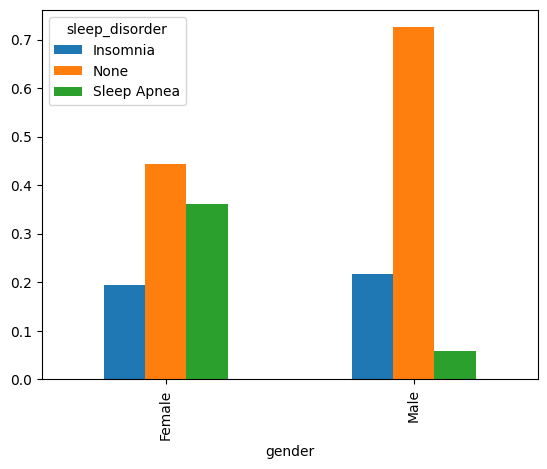

In [59]:
grouped = demo_sleep.groupby('gender')['sleep_disorder'].value_counts(normalize=True)
grouped = grouped.unstack()
grouped.plot(kind='bar')
plt.show()

In [60]:
demo_sleep.groupby('occupation').mean(numeric_only=True)

,quality_of_sleep,sleep_duration,age
occupation,,,
Accountant,7.891892,7.113514,39.621622
Doctor,6.647887,6.970423,32.676056
Engineer,8.298507,7.913433,45.671642
Lawyer,7.893617,7.410638,39.425532
Nurse,7.369863,7.063014,51.794521
Other,5.400000,6.180000,35.800000
Salesperson,5.882353,6.373529,42.617647
Teacher,6.975000,6.690000,41.725000


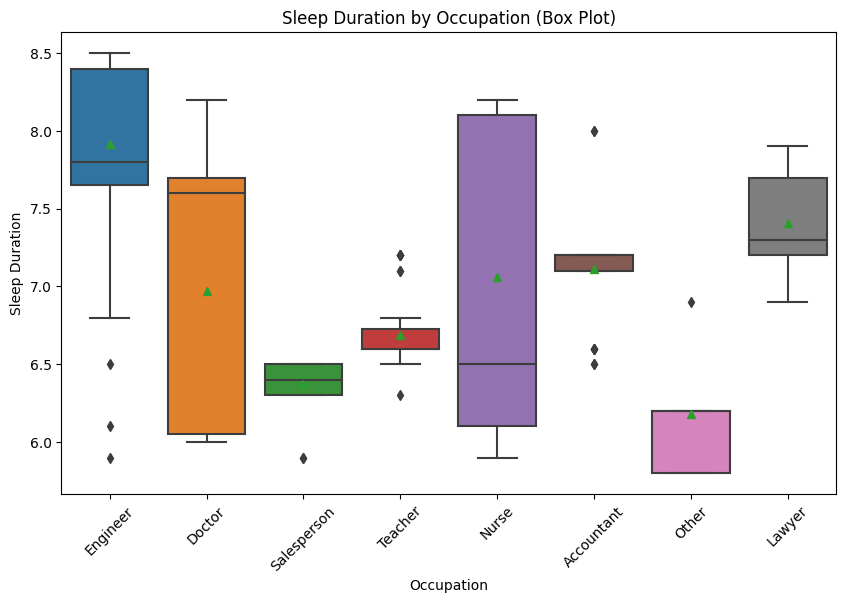

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=demo_sleep, x='occupation', y='sleep_duration', showmeans=True)
plt.title('Sleep Duration by Occupation (Box Plot)')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)  # X eksenindeki meslek etiketlerini döndürme
plt.show()

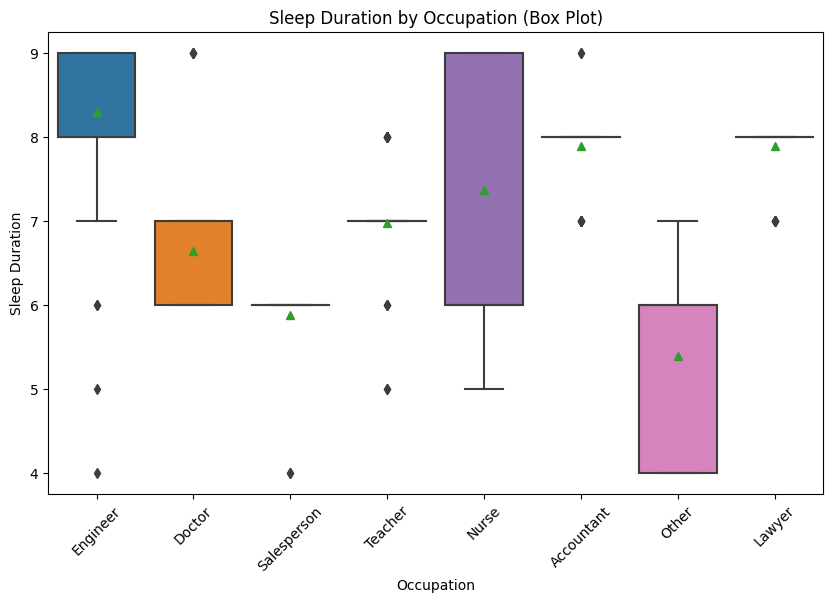

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=demo_sleep, x='occupation', y='quality_of_sleep', showmeans=True)
plt.title('Sleep Duration by Occupation (Box Plot)')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)  # X eksenindeki meslek etiketlerini döndürme
plt.show()

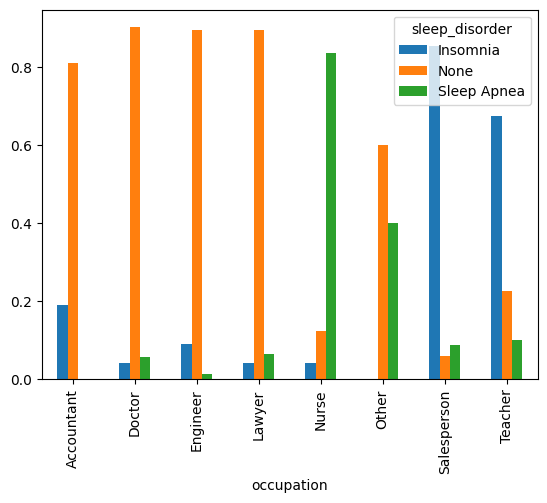

In [63]:
demo_sleep.groupby('occupation')['sleep_disorder'].value_counts(normalize=True).unstack().plot.bar();

###General: The graph shows that the prevalence of sleep disorders varies by occupation.
Accountants: Of the listed occupations, accountants appear to have the highest prevalence for both insomnia (25%) and sleep apnoea (15%).
Doctors: Doctors appear to have a lower prevalence of sleep disorders compared to accountants, with 10% experiencing insomnia and 5% experiencing sleep apnoea.
Engineers: The graph shows that engineers have a similar prevalence of insomnia (15%) as accountants, but a lower prevalence of sleep apnoea (5%).
Salespeople: Salespeople appear to have a lower prevalence of both sleep disorders compared to accountants and engineers. The graph shows that 10% of salespeople experience insomnia and 5% experience sleep apnoea.
Teachers: Teachers appear to have the lowest prevalence of sleep disorders among the occupations listed on the chart. The values show that 5% of teachers experience insomnia and 5% experience sleep apnoea.

In [64]:
health_sleep = df[['sleep_disorder', 'quality_of_sleep','sleep_duration','physical_activity_level','daily_steps','stress_level','bmi_category','heart_rate','systolic_blood_pressure','diastolic_blood_pressure']].copy(deep=True)

In [65]:
health_sleep.head(3)

,sleep_disorder,quality_of_sleep,sleep_duration,physical_activity_level,daily_steps,stress_level,bmi_category,heart_rate,systolic_blood_pressure,diastolic_blood_pressure
0,None,6,6.1,42,4200,6,Overweight,77,126,83
1,None,6,6.2,60,10000,8,Normal,75,125,80
2,None,6,6.2,60,10000,8,Normal,75,125,80


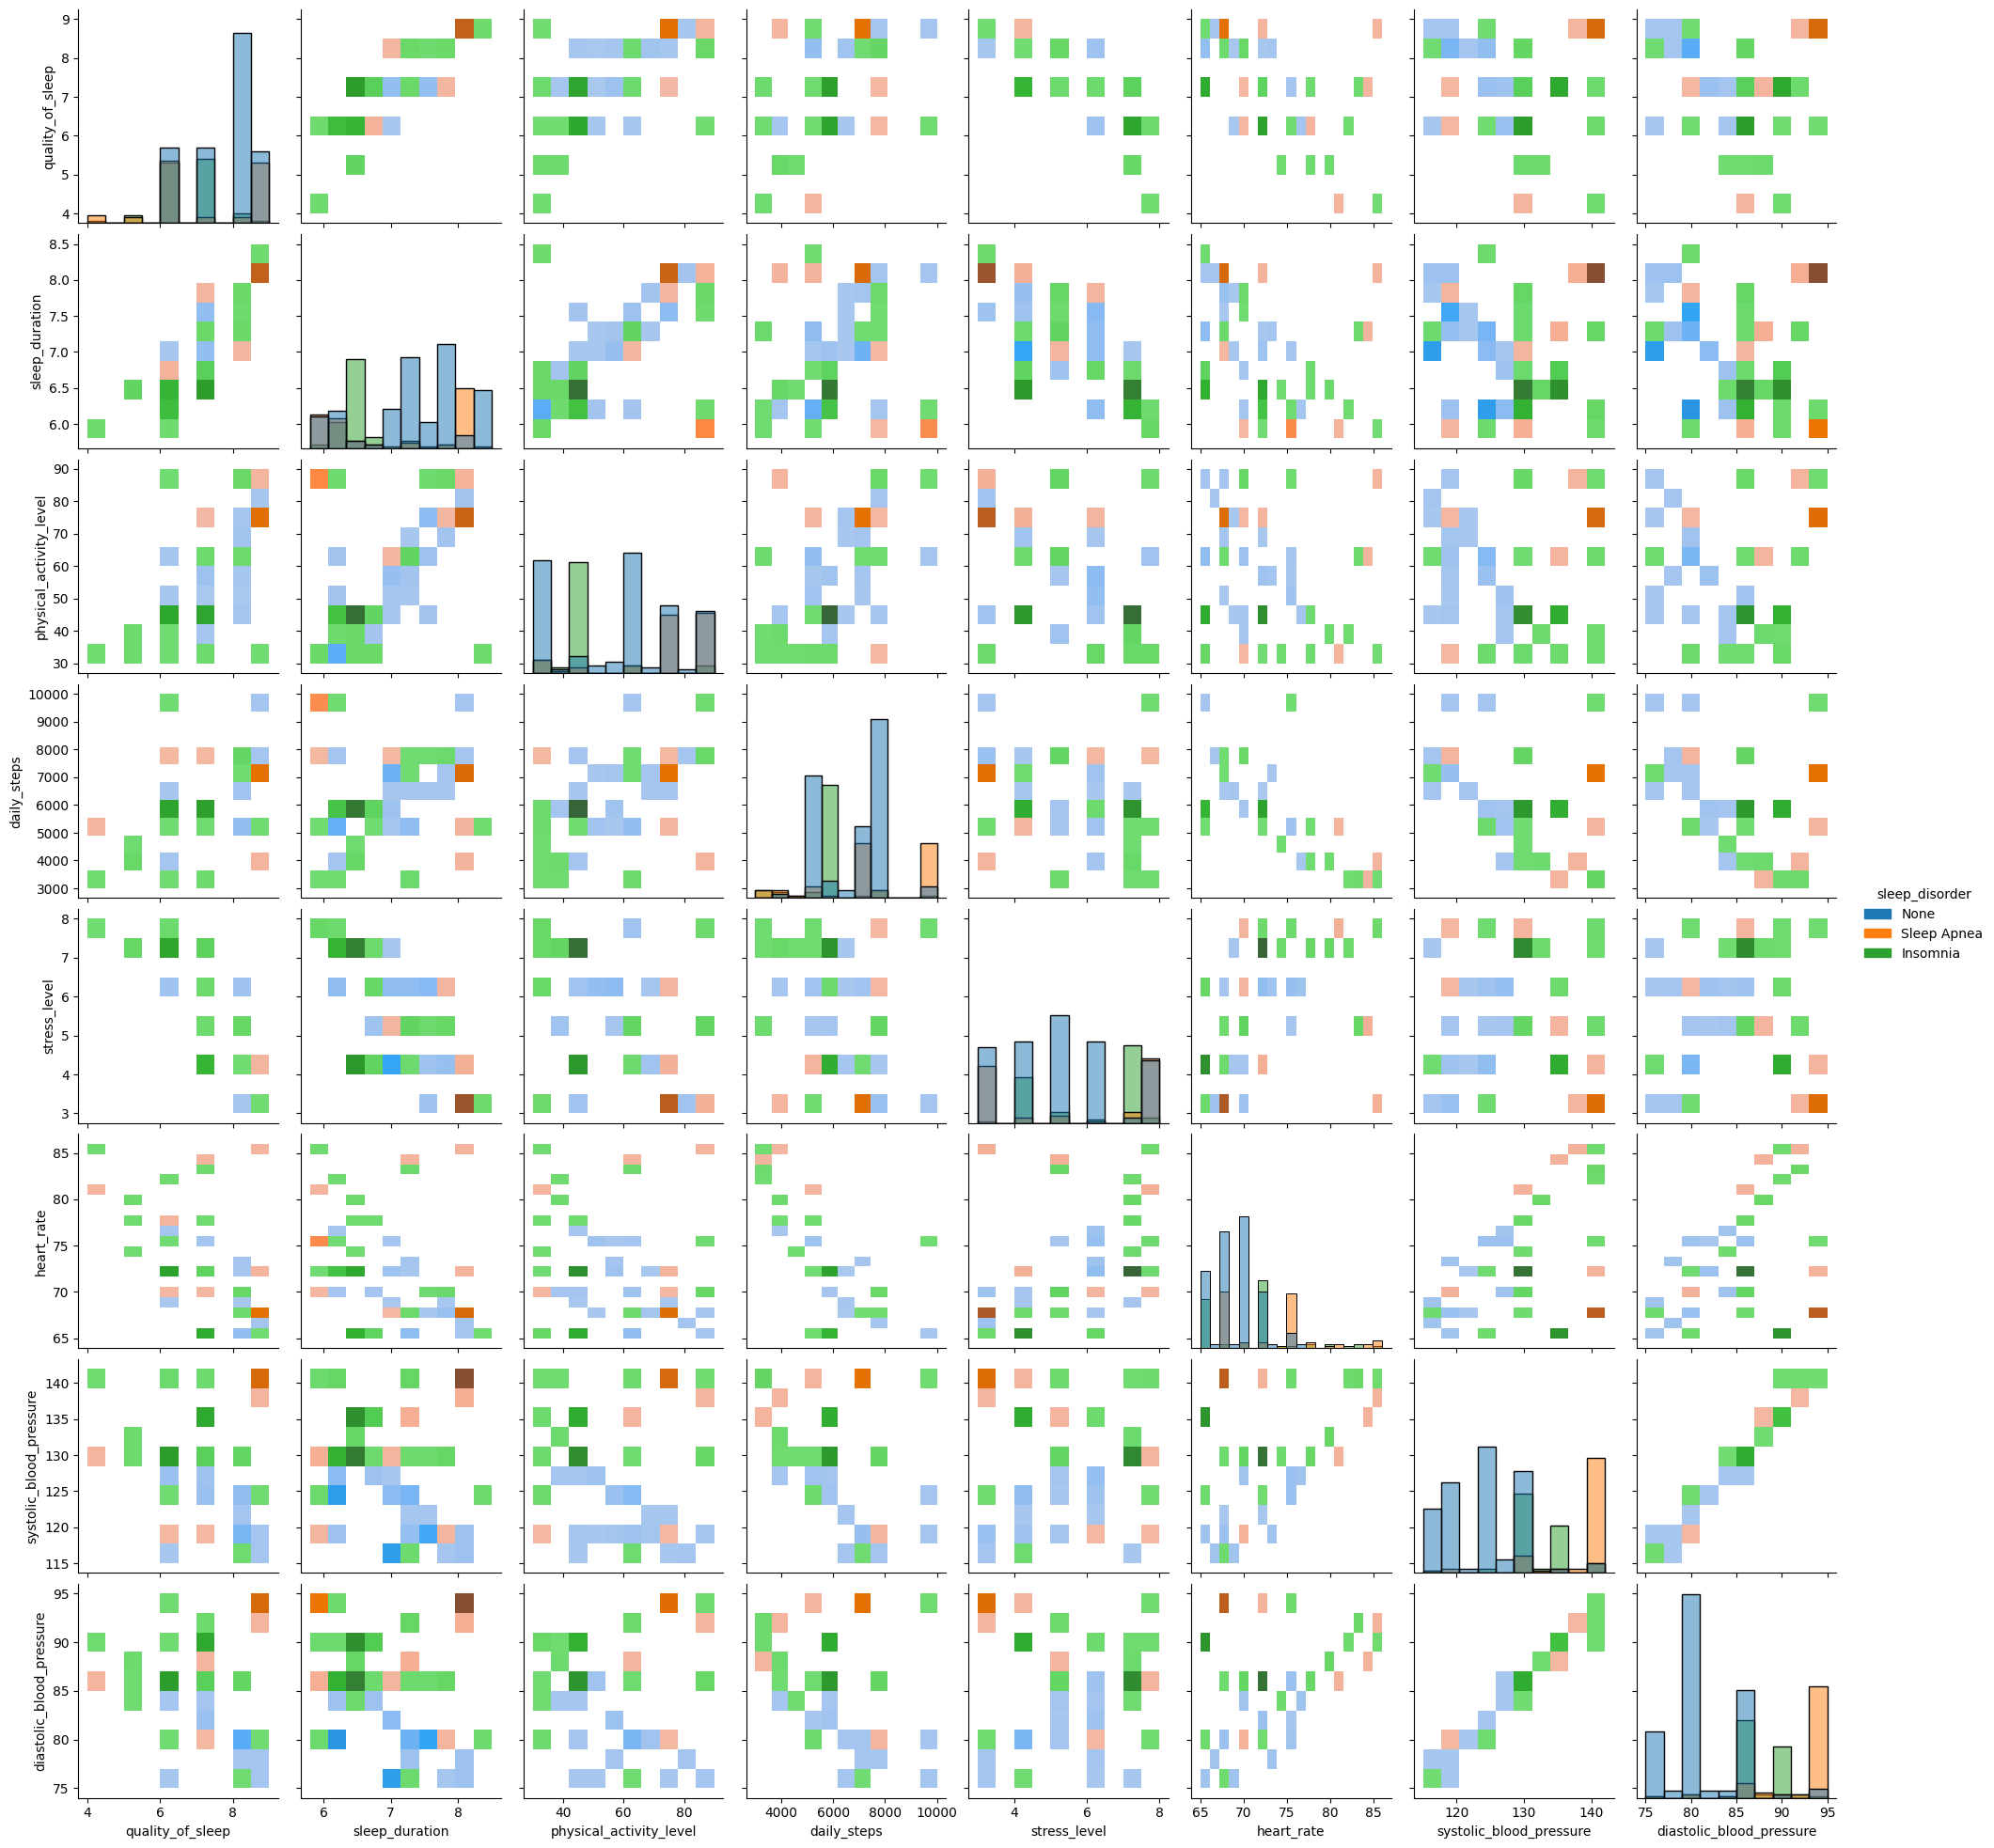

In [66]:
sns.pairplot(data=health_sleep, kind="hist", hue='sleep_disorder')

In [67]:
health_sleep.groupby('sleep_disorder').mean(numeric_only=True)

,quality_of_sleep,sleep_duration,physical_activity_level,daily_steps,stress_level,heart_rate,systolic_blood_pressure,diastolic_blood_pressure
sleep_disorder,,,,,,,,
Insomnia,6.532468,6.589610,46.818182,5901.298701,5.870130,70.467532,132.038961,86.857143
None,7.625571,7.358447,57.949772,6852.968037,5.114155,69.018265,124.045662,81.000000
Sleep Apnea,7.205128,7.032051,74.794872,7619.230769,5.666667,73.089744,137.769231,92.717949


In [68]:
scipy.stats.normaltest(health_sleep.systolic_blood_pressure)

NormaltestResult(statistic=44.32888074580998, pvalue=2.366496418710339e-10)

In [69]:
scipy.stats.normaltest(health_sleep.diastolic_blood_pressure)

NormaltestResult(statistic=43.1200849985241, pvalue=4.3310431735544495e-10)

In [70]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.sleep_disorder=='None'].systolic_blood_pressure,health_sleep[health_sleep.sleep_disorder == 'Insomnia'].systolic_blood_pressure)

MannwhitneyuResult(statistic=2032.5, pvalue=2.7925337312647312e-24)

In [71]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.sleep_disorder == 'Insomnia'].systolic_blood_pressure, health_sleep[health_sleep.sleep_disorder == 'Sleep Apnea'].systolic_blood_pressure)

MannwhitneyuResult(statistic=970.5, pvalue=1.5833817261716064e-14)

In [72]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.sleep_disorder =='None'].systolic_blood_pressure,health_sleep[health_sleep.sleep_disorder == 'Sleep Apnea'].systolic_blood_pressure)

MannwhitneyuResult(statistic=980.5, pvalue=3.099666428013716e-32)

In [73]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.sleep_disorder=='None']. diastolic_blood_pressure, health_sleep[health_sleep.sleep_disorder == 'Insomnia'].diastolic_blood_pressure)

MannwhitneyuResult(statistic=2134.5, pvalue=1.927261028283621e-24)

In [74]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.sleep_disorder == 'Insomnia'].diastolic_blood_pressure, health_sleep[health_sleep.sleep_disorder == 'Sleep Apnea'].diastolic_blood_pressure)

MannwhitneyuResult(statistic=822.0, pvalue=2.933840387185841e-16)

In [75]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.sleep_disorder == 'None'].diastolic_blood_pressure,health_sleep[health_sleep.sleep_disorder=='Sleep Apnea'].diastolic_blood_pressure)

MannwhitneyuResult(statistic=908.0, pvalue=5.657915311442221e-34)

In [76]:
health_sleep[['heart_rate','stress_level','quality_of_sleep','sleep_duration']].corr(method='pearson')

,heart_rate,stress_level,quality_of_sleep,sleep_duration
heart_rate,1.000000,0.670026,-0.659865,-0.516455
stress_level,0.670026,1.000000,-0.898752,-0.811023
quality_of_sleep,-0.659865,-0.898752,1.000000,0.883213
sleep_duration,-0.516455,-0.811023,0.883213,1.000000


In [77]:
health_sleep[['heart_rate','stress_level','quality_of_sleep','sleep_duration','sleep_disorder']].groupby('sleep_disorder').corr(method='pearson')

heart_rate  stress_level  quality_of_sleep  \
sleep_disorder                                                                
Insomnia       heart_rate          1.000000      0.719036         -0.605499   
               stress_level        0.719036      1.000000         -0.723100   
               quality_of_sleep   -0.605499     -0.723100          1.000000   
               sleep_duration     -0.163630     -0.487877          0.753207   
None           heart_rate          1.000000      0.800938         -0.809742   
               stress_level        0.800938      1.000000         -0.938882   
               quality_of_sleep   -0.809742     -0.938882          1.000000   
               sleep_duration     -0.678363     -0.778761          0.836940   
Sleep Apnea    heart_rate          1.000000      0.605020         -0.703582   
               stress_level        0.605020      1.000000         -0.945325   
               quality_of_sleep   -0.703582     -0.945325          1.000000   
               sleep_duration     -0.598596     -0.984028          0.944228   

                                 sleep_duration  
sleep_disorder                                   
Insomnia       heart_rate             -0.163630  
               stress_level           -0.487877  
               quality_of_sleep        0.753207  
               sleep_duration          1.000000  
None           heart_rate             -0.678363  
               stress_level           -0.778761  
               quality_of_sleep        0.836940  
               sleep_duration          1.000000  
Sleep Apnea    heart_rate             -0.598596  
               stress_level           -0.984028  
               quality_of_sleep        0.944228  
               sleep_duration          1.000000

In [78]:
df.groupby('bmi_category').mean(numeric_only = True)

,person_id,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,systolic_blood_pressure,diastolic_blood_pressure
bmi_category,,,,,,,,,,
Normal,139.648148,38.472222,7.387963,7.638889,57.949074,5.134259,68.976852,6875.462963,123.606481,80.601852
Obese,134.900000,38.000000,6.960000,6.400000,55.000000,5.700000,84.300000,3350.000000,139.200000,90.200000
Overweight,260.891892,47.885135,6.770270,6.898649,61.236486,5.729730,70.945946,6965.540541,135.054054,90.182432


In [79]:
df['bmi_category'].value_counts()

bmi_category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [80]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.bmi_category == 'Normal'].sleep_duration,health_sleep[health_sleep.bmi_category == 'Overweight'].sleep_duration )

MannwhitneyuResult(statistic=22449.5, pvalue=5.085800934608319e-11)

In [81]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.bmi_category=='Overweight'].sleep_duration,health_sleep[health_sleep.bmi_category=='Obese'].sleep_duration)

MannwhitneyuResult(statistic=707.5, pvalue=0.8184198340604408)

In [82]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.bmi_category=='Normal'].sleep_duration,health_sleep[health_sleep.bmi_category=='Obese'].sleep_duration)

MannwhitneyuResult(statistic=1356.0, pvalue=0.1709822364847371)

In [83]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.bmi_category=='Normal'].quality_of_sleep,health_sleep[health_sleep.bmi_category=='Overweight'].quality_of_sleep)

MannwhitneyuResult(statistic=21687.0, pvalue=2.220619581682694e-09)

In [84]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.bmi_category=='Overweight'].quality_of_sleep,health_sleep[health_sleep.bmi_category=='Obese'].quality_of_sleep)

MannwhitneyuResult(statistic=796.0, pvalue=0.6723590634198593)

In [85]:
scipy.stats.mannwhitneyu(health_sleep[health_sleep.bmi_category=='Normal'].quality_of_sleep,health_sleep[health_sleep.bmi_category=='Obese'].quality_of_sleep)

MannwhitneyuResult(statistic=1523.0, pvalue=0.019455164346350157)

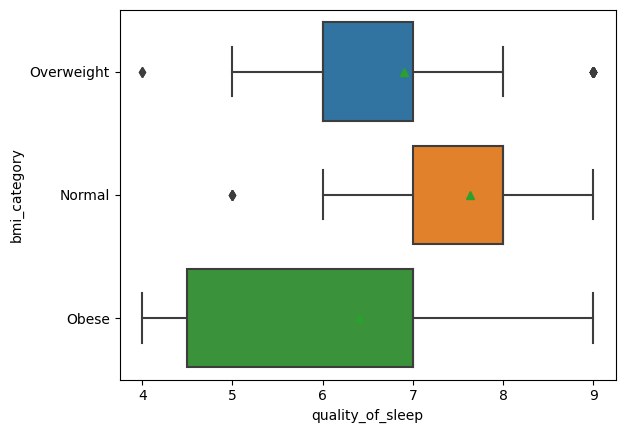

In [86]:
sns.boxplot(data=health_sleep, x='quality_of_sleep', y='bmi_category', showmeans=True);

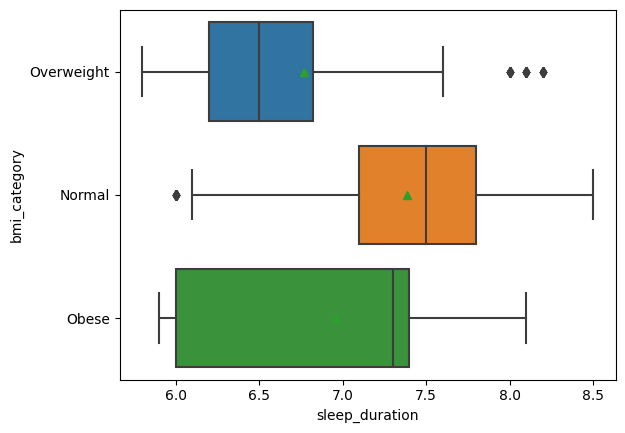

In [87]:
sns.boxplot(data=health_sleep, x='sleep_duration', y='bmi_category', showmeans=True);

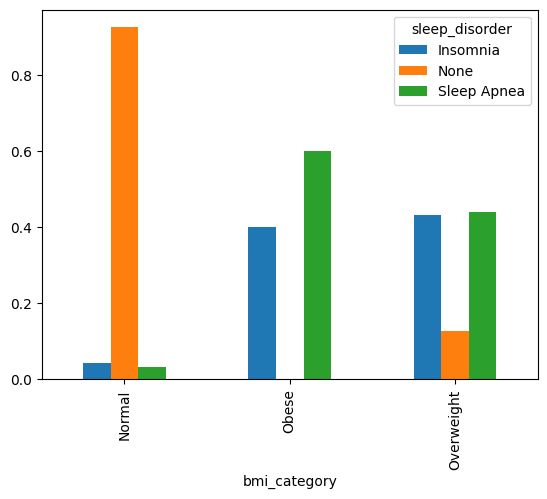

In [88]:
health_sleep.groupby('bmi_category')['sleep_disorder'].value_counts(normalize=True).unstack().plot.bar();

In [89]:
health_sleep.groupby('bmi_category')['sleep_disorder'].value_counts(normalize=True).unstack()

sleep_disorder,Insomnia,None,Sleep Apnea
bmi_category,,,
Normal,0.041667,0.925926,0.032407
Obese,0.400000,NaN,0.600000
Overweight,0.432432,0.128378,0.439189


The incidence of sleep apnoea in obese people is higher than in normal or overweight people.
The incidence of insomnia is higher in obese people than in normal or overweight people.
The incidence of sleep apnoea and insomnia in overweight people is higher than in normal weight people, but lower than in obese people.

In [90]:
#THANK YOU.